# Train-Test-Split

In this notebook we will split the data into train-val-test sets and save them in the data folder

In [1]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# read in the dataset
um_features = pd.read_csv(r"..\data\tokens\um_features_tokenized.csv")
um_target = pd.read_csv(r"..\data\tokens\um_target_tokenized.csv")

In [3]:
# model variables 
X = um_features.values
y = um_target.values
# check the data
print(X[0])
print(y[0])

["['<bos>', 'შ', 'ე', 'უ', 'ძ', 'ლ', 'ი', 'ა', 'ARGNO1S', 'IND', 'PRS', '<eos>']"]
["['<bos>', 'შ', 'ე', 'მ', 'ი', 'ძ', 'ლ', 'ი', 'ა', '<eos>']"]


In [4]:
# train, val, test split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
val_size = 0.15 / (1 - 0.15)  # Adjust the validation size to account for the test split
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_size, random_state=42)
# check the data
print("Train size X:", len(X_train), "Validation size:", len(X_val), "Test size:", len(X_test))
print("Train size y:", len(y_train), "Validation size:", len(y_val), "Test size:", len(y_test))

Train size X: 14737 Validation size: 3158 Test size: 3159
Train size y: 14737 Validation size: 3158 Test size: 3159


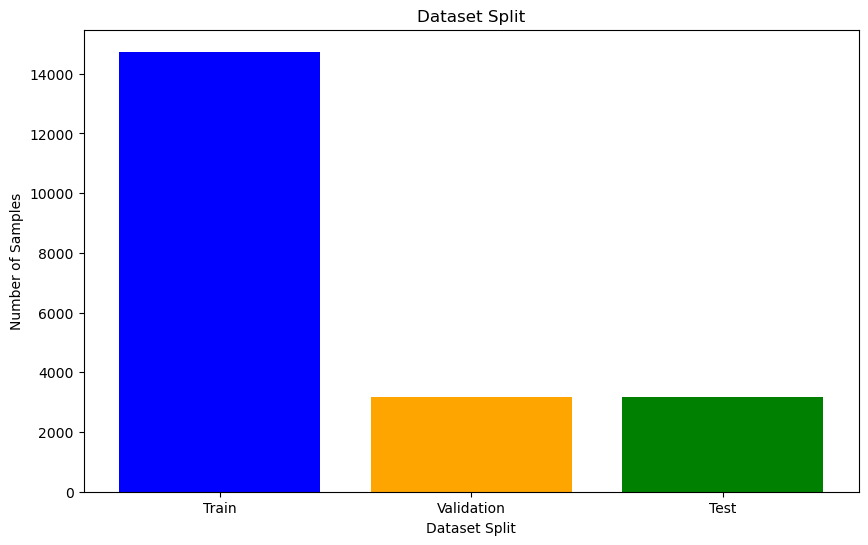

In [5]:
# visualize the split
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(['Train', 'Validation', 'Test'], [len(X_train), len(X_val), len(X_test)], color=['blue', 'orange', 'green'])
plt.title('Dataset Split')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Samples')
plt.show()

In [6]:
# save X_train, X_val, X_test
pd.DataFrame(X_train).to_json(r"..\data\train-test-eval\X_train.json", index=False)
pd.DataFrame(X_val).to_json(r"..\data\train-test-eval\X_val.json", index=False)
pd.DataFrame(X_test).to_json(r"..\data\train-test-eval\X_test.json", index=False)
# save y_train, y_val, y_test
pd.DataFrame(y_train).to_json(r"..\data\train-test-eval\y_train.json", index=False)
pd.DataFrame(y_val).to_json(r"..\data\train-test-eval\y_val.json", index=False)
pd.DataFrame(y_test).to_json(r"..\data\train-test-eval\y_test.json", index=False)